#### machine learning preliminary experiment

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
merged = pd.read_pickle('../dataset/merged_data_3class.pkl')
merged

,sex,age,edu,end,GAF,RIN,raw_reads,clean_reads,Q20,Q30,...,EEF1A1P21,AC006380.1,AGR3,RHBDF1P1,GAPDHP67,SKOR2,AC007064.2,MAB21L4,AC006328.1,AL080248.1
id,,,,,,,,,,,,,,,,,,,,,
n337,1,14,8,1,56,8.1,7.911602,7.901730,97.24,92.79,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n342,0,17,9,1,52,9.0,7.886186,7.877051,97.52,93.32,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n346,0,17,9,1,47,8.8,7.936888,7.928224,97.39,93.09,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n348,0,21,14,1,48,8.3,7.857012,7.849438,97.24,92.78,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n349,0,18,9,2,46,8.3,7.973639,7.963862,98.07,94.73,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n442c,1,14,8,1,66,8.8,7.989200,7.983345,97.68,93.76,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n449c,0,15,9,0,72,7.9,7.994069,7.985102,97.71,93.89,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n457c,1,27,16,1,71,6.9,7.999861,7.991270,97.48,93.40,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
merged = merged.reset_index(drop=False)
merged

,id,sex,age,edu,end,GAF,RIN,raw_reads,clean_reads,Q20,...,EEF1A1P21,AC006380.1,AGR3,RHBDF1P1,GAPDHP67,SKOR2,AC007064.2,MAB21L4,AC006328.1,AL080248.1
0,n337,1,14,8,1,56,8.1,7.911602,7.901730,97.24,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,n342,0,17,9,1,52,9.0,7.886186,7.877051,97.52,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,n346,0,17,9,1,47,8.8,7.936888,7.928224,97.39,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,n348,0,21,14,1,48,8.3,7.857012,7.849438,97.24,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,n349,0,18,9,2,46,8.3,7.973639,7.963862,98.07,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,n442c,1,14,8,1,66,8.8,7.989200,7.983345,97.68,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,n449c,0,15,9,0,72,7.9,7.994069,7.985102,97.71,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,n457c,1,27,16,1,71,6.9,7.999861,7.991270,97.48,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,n465c,1,14,8,1,60,7.5,8.022328,8.013831,97.73,...,0.041761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
merged = merged.fillna(0)
from sklearn.utils import shuffle
shuffled = shuffle(merged)
#shuffled.to_pickle('../dataset/merged_data_shuffled_3class.pkl')
shuffled = pd.read_pickle('../dataset/merged_data_shuffled_3class.pkl')

train = shuffled[0:int(0.9*shuffled.shape[0])]
test = shuffled[int(0.9*shuffled.shape[0]):]

labels = np.array(shuffled['end'])
features = np.array(shuffled.drop(columns=['end','id']))
print(labels.shape)
print(features.shape)

train_y = np.array(train['end'])
train_x = np.array(train.drop(columns=['end','id']))
test_y = np.array(test['end'])
test_x = np.array(test.drop(columns=['end','id']))

X = features
Y = labels
print(Y)

(107,)
(107, 39527)
[0 1 1 0 0 0 0 0 2 0 1 1 0 1 0 1 2 2 0 2 1 0 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 2 1 0 0 0 0 1 0 1 0 2 1 0 0 0 1 1 0 0 0 1 0 0 0 2 0 0 1
 0 0 1 0 0 0 0 2 0 0 1 1 1 2 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 2 1]


              precision    recall  f1-score   support

          re       0.62      0.83      0.71         6
         sym       0.67      0.50      0.57         4
         con       0.00      0.00      0.00         1

    accuracy                           0.64        11
   macro avg       0.43      0.44      0.43        11
weighted avg       0.58      0.64      0.60        11



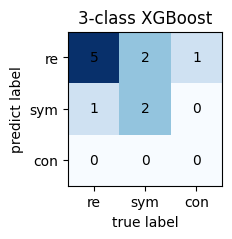

In [33]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import class_weight

model_name = 'XGBoost'

clf = xgb.XGBClassifier(n_jobs=-1)
#clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Blues')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
#ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('3-class '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.57      0.67      0.62         6
         sym       0.50      0.50      0.50         4
         con       0.00      0.00      0.00         1

    accuracy                           0.55        11
   macro avg       0.36      0.39      0.37        11
weighted avg       0.49      0.55      0.52        11



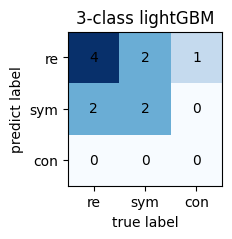

In [34]:
import lightgbm as lgb

model_name = 'lightGBM'

clf = lgb.LGBMClassifier(n_jobs=-1)
#clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Blues')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('3-class '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.57      0.67      0.62         6
         sym       0.50      0.50      0.50         4
         con       0.00      0.00      0.00         1

    accuracy                           0.55        11
   macro avg       0.36      0.39      0.37        11
weighted avg       0.49      0.55      0.52        11



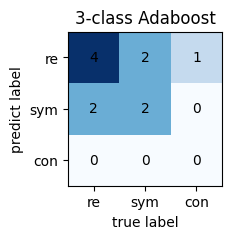

In [35]:
from sklearn.ensemble import AdaBoostClassifier

model_name = 'Adaboost'

clf = AdaBoostClassifier()
clf.fit(train_x, train_y)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Blues')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('3-class '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.56      0.83      0.67         6
         sym       0.50      0.25      0.33         4
         con       0.00      0.00      0.00         1

    accuracy                           0.55        11
   macro avg       0.35      0.36      0.33        11
weighted avg       0.48      0.55      0.48        11



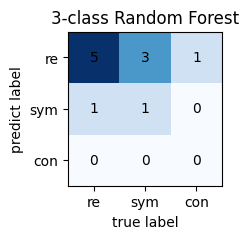

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_name = 'Random Forest'

clf = RandomForestClassifier()
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)

#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Blues')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('3-class '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.50      0.50      0.50         6
         sym       0.25      0.25      0.25         4
         con       0.00      0.00      0.00         1

    accuracy                           0.36        11
   macro avg       0.25      0.25      0.25        11
weighted avg       0.36      0.36      0.36        11



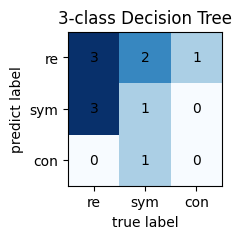

In [37]:
from sklearn.tree import DecisionTreeClassifier

model_name = 'Decision Tree'

clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Blues')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('3-class '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.75      0.50      0.60         6
         sym       0.67      0.50      0.57         4
         con       0.25      1.00      0.40         1

    accuracy                           0.55        11
   macro avg       0.56      0.67      0.52        11
weighted avg       0.67      0.55      0.57        11



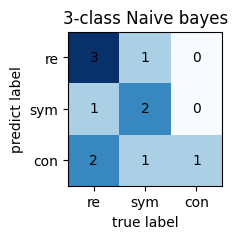

In [38]:
from sklearn.naive_bayes import GaussianNB

model_name = 'Naive bayes'

clf = GaussianNB()
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Blues')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('3-class '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.50      0.83      0.62         6
         sym       0.00      0.00      0.00         4
         con       0.00      0.00      0.00         1

    accuracy                           0.45        11
   macro avg       0.17      0.28      0.21        11
weighted avg       0.27      0.45      0.34        11



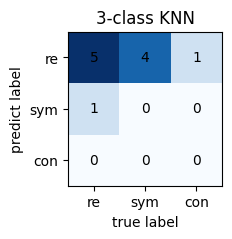

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model_name = 'KNN'

clf = KNeighborsClassifier()
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Blues')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('3-class '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.57      0.67      0.62         6
         sym       0.50      0.50      0.50         4
         con       0.00      0.00      0.00         1

    accuracy                           0.55        11
   macro avg       0.36      0.39      0.37        11
weighted avg       0.49      0.55      0.52        11



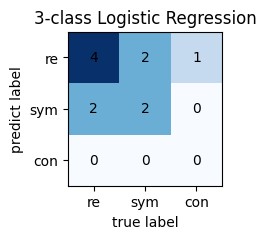

In [40]:
from sklearn.linear_model import LogisticRegression

model_name = 'Logistic Regression'

clf = LogisticRegression()
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='Blues')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('3-class '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

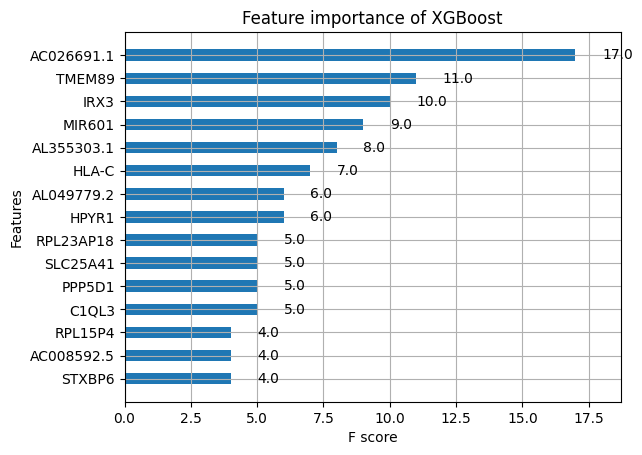

In [41]:
## feature importance
import matplotlib.pyplot as plt
%matplotlib inline

# xgboost
model_name='XGBoost'

import xgboost
clf = xgb.XGBClassifier(n_jobs=-1)
clf.fit(X, Y, sample_weight=class_weight.compute_sample_weight("balanced", Y))
#clf.fit(X, Y)

feature_names = merged.drop(columns=['end','id']).columns.values.tolist()
clf.get_booster().feature_names = feature_names
xgboost.plot_importance(clf, height=0.5, max_num_features=15)
plt.title('Feature importance of '  + model_name)
plt.savefig('../images/class3/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 876227
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 28077
[LightGBM] [Info] Start training from score 0.542056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

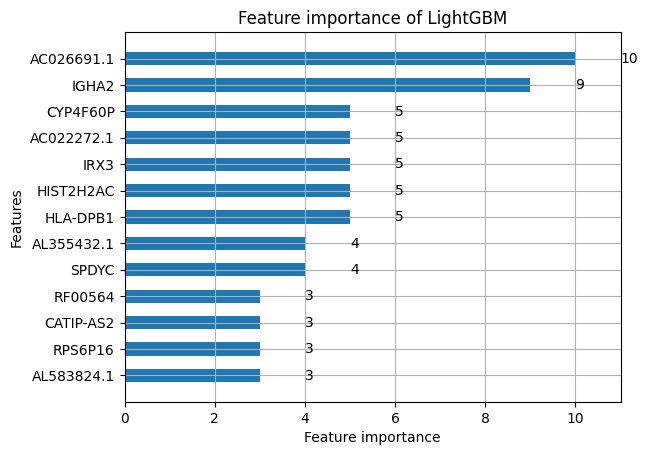

In [18]:
# lightGBM
model_name='LightGBM'
feature_names = merged.drop(columns=['end','id']).columns.values.tolist()

params = {
    'task': 'train',
    'boosting_type': 'gbdt',  
    'objective': 'regression',  
    'metric': {'auc'},  
    'num_leaves': 31,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'verbose': 1  
}

import lightgbm as lgb
train = lgb.Dataset(data=merged.drop(columns=['end','id']),label=merged['end'])
#clf = lgb.LGBMClassifier(n_jobs=-1)
clf = lgb.train(params,train)

ax = lgb.plot_importance(clf, height=0.5, max_num_features=13)
plt.title('Feature importance of '  + model_name)

plt.savefig('../images/class3/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

In [15]:
'''
merged = pd.read_pickle('../dataset/merged_data.pkl')
merged.to_csv('../dataset/merged_data.csv')
'''

"\nmerged = pd.read_pickle('../dataset/merged_data.pkl')\nmerged.to_csv('../dataset/merged_data.csv')\n"